# Mini Bach K-Means

[[ 1.95449136 -2.57939134]
 [-2.20726474  2.29647429]
 [ 2.53200508  3.03582006]
 [-3.28219205 -2.69596403]]
[1 0 3 2 1 0 3 2 1 0 0 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1]


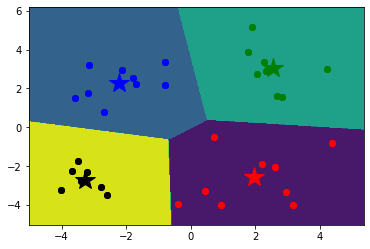

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import MiniBatchKMeans

#加载数据
data = np.genfromtxt("kmeans.csv",delimiter=',')

#设置k值
k = 4

#创建模型 并训练模型
model = MiniBatchKMeans(n_clusters=k)
model.fit(data)

#分类中心点坐标
centers = model.cluster_centers_
print(centers)

#预测
result = model.predict(data)
# print(result)
# print(model.labels_)#同样输出预测结果

#获得簇的作用域
x_min,x_max = data[:,0].min()-1,data[:,0].max()+1
y_min,y_max = data[:,1].min()-1,data[:,1].max()+1

#生成网格矩阵
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),
                   np.arange(y_min,y_max,0.02))

z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

#等高线图
cs = plt.contourf(xx,yy,z)

#画出各个数据点，用不同颜色表示分类
mark = ['or','ob','og','ok']
for i,d in enumerate(data):
    plt.plot(d[0],d[1],mark[result[i]])

for i,d in enumerate(data):
    plt.plot(d[0],d[1],mark[result[i]])

#画出各个分类的中心点
mark = ['*r','*b','*g','*k']

for i,center in enumerate(centers):
    plt.plot(center[0],center[1],mark[i],markersize=20)

    
plt.show()
